In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns

Importing the data

In [14]:
df = pd.read_csv('ai4i2020.csv')
# print first 5 rows
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [15]:
# update column names
df.columns =  df.columns.str.replace(' ','_')
df

,UDI,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Data Preprocessing
### checking for missing values and finding missing values 

In [16]:
print(df.dtypes)
# ignoring product_id
df['Type'].unique()
df.isnull().sum()

UDI                          int64
Product_ID                  object
Type                        object
Air_temperature_[K]        float64
Process_temperature_[K]    float64
Rotational_speed_[rpm]       int64
Torque_[Nm]                float64
Tool_wear_[min]              int64
Machine_failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


UDI                        0
Product_ID                 0
Type                       0
Air_temperature_[K]        0
Process_temperature_[K]    0
Rotational_speed_[rpm]     0
Torque_[Nm]                0
Tool_wear_[min]            0
Machine_failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

No null values, proceeding further

In [17]:
# replace type with integers since its categorical , can do One-hot encoding and apply column transformation.
df.replace(['L', 'M', 'H'], [1, 2, 3], inplace=True)
df.head()

,UDI,Product_ID,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


Data set is clean and there are no missing values

In [18]:
# Describing about data
df.describe()

,UDI,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,1.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,1.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,1.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,2.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,3.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [19]:
# format data for classification
X = df.drop(['UDI','Machine_failure', 'Product_ID'], axis=1).copy()
# X = df.drop(['UDI','Machine_failure', 'Product_ID', 'TWF','HDF','PWF','OSF','RNF'], axis=1).copy()
X.head()

,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0


should we need to check for outliers?

In [20]:
y = df['Machine_failure'].copy()
y.head()
y.value_counts()

0    9661
1     339
Name: Machine_failure, dtype: int64

### Build a Classification tree

In [21]:
# split data set to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
init_dtree = DecisionTreeClassifier(random_state=42)
init_dtree = init_dtree.fit(X_train, y_train)

[Text(0.8028846153846154, 0.9615384615384616, 'HDF <= 0.5\ngini = 0.069\nsamples = 7500\nvalue = [7233, 267]\nclass = fail 1'),
 Text(0.7644230769230769, 0.8846153846153846, 'OSF <= 0.5\ngini = 0.046\nsamples = 7407\nvalue = [7233, 174]\nclass = fail 1'),
 Text(0.7259615384615384, 0.8076923076923077, 'PWF <= 0.5\ngini = 0.027\nsamples = 7335\nvalue = [7233, 102]\nclass = fail 1'),
 Text(0.6875, 0.7307692307692307, 'TWF <= 0.5\ngini = 0.011\nsamples = 7272\nvalue = [7233, 39]\nclass = fail 1'),
 Text(0.6490384615384616, 0.6538461538461539, 'Rotational_speed_[rpm] <= 1439.5\ngini = 0.002\nsamples = 7240\nvalue = [7233, 7]\nclass = fail 1'),
 Text(0.4519230769230769, 0.5769230769230769, 'Rotational_speed_[rpm] <= 1437.5\ngini = 0.005\nsamples = 2095\nvalue = [2090, 5]\nclass = fail 1'),
 Text(0.28846153846153844, 0.5, 'Tool_wear_[min] <= 209.5\ngini = 0.003\nsamples = 2054\nvalue = [2051, 3]\nclass = fail 1'),
 Text(0.15384615384615385, 0.4230769230769231, 'Air_temperature_[K] <= 301.85\n

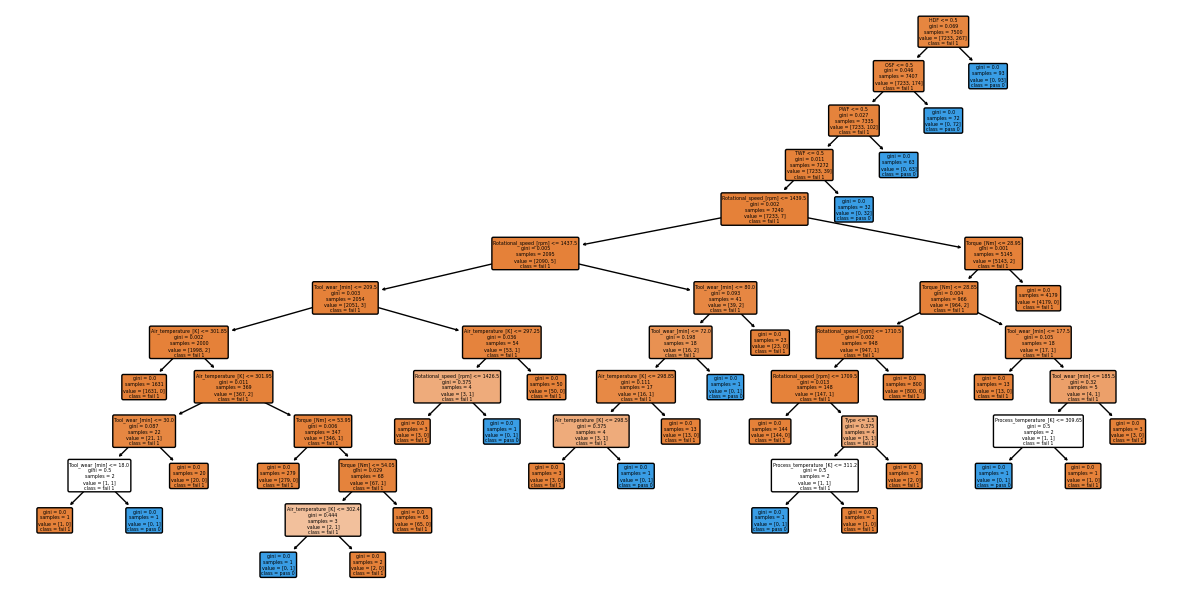

In [22]:
plt.figure(figsize=(15,7.5))
plot_tree(init_dtree, filled=True, rounded=True, class_names=['fail 1', 'pass 0'], feature_names=X.columns)

In [23]:
res = init_dtree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 0.9976


In [24]:
# prune the decision tree because initial decision tree is HUGE
path = init_dtree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

pruned_dts = []
for ccp_alpha in ccp_alphas:
    pruned_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    pruned_dt.fit(X_train, y_train)
    pruned_dts.append(pruned_dt)

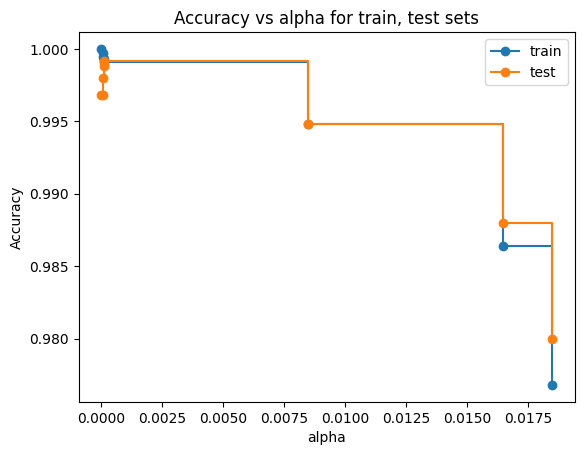

In [25]:
train_scores = [pruned_dt.score(X_train, y_train) for pruned_dt in pruned_dts]
test_scores = [pruned_dt.score(X_test, y_test) for pruned_dt in pruned_dts]
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for train, test sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [70]:
final_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0150)
final_dt = final_dt.fit(X_train, y_train)

[Text(0.6666666666666666, 0.875, 'HDF <= 0.5\ngini = 0.069\nsamples = 7500\nvalue = [7233, 267]\nclass = fail 1'),
 Text(0.5, 0.625, 'OSF <= 0.5\ngini = 0.046\nsamples = 7407\nvalue = [7233, 174]\nclass = fail 1'),
 Text(0.3333333333333333, 0.375, 'PWF <= 0.5\ngini = 0.027\nsamples = 7335\nvalue = [7233, 102]\nclass = fail 1'),
 Text(0.16666666666666666, 0.125, 'gini = 0.011\nsamples = 7272\nvalue = [7233, 39]\nclass = fail 1'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 63\nvalue = [0, 63]\nclass = pass 0'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 72\nvalue = [0, 72]\nclass = pass 0'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 93\nvalue = [0, 93]\nclass = pass 0')]

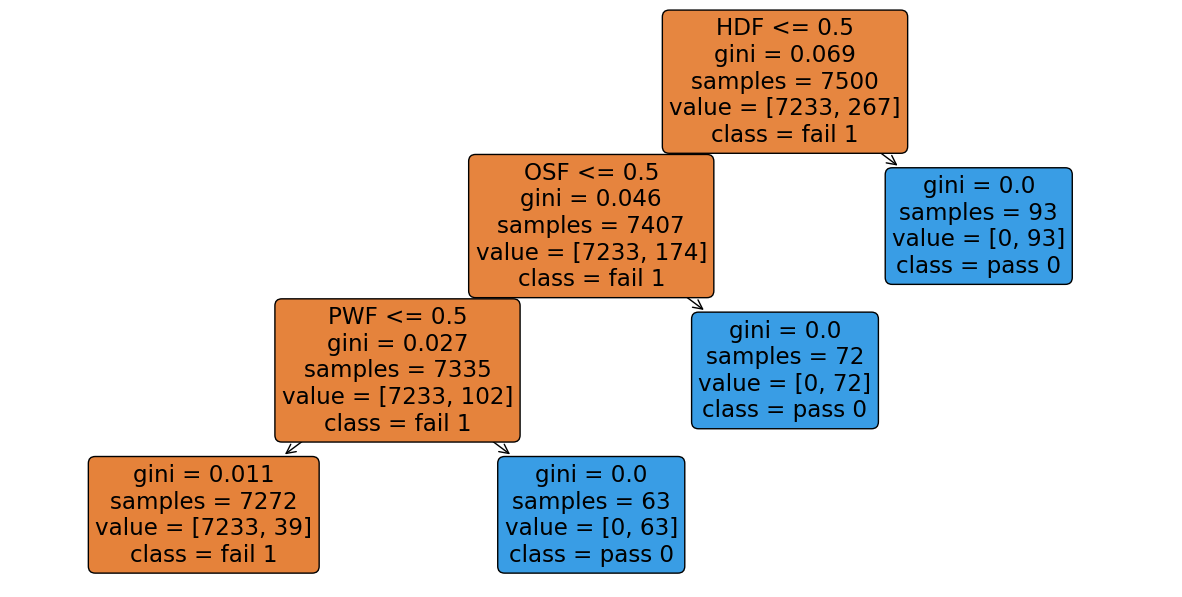

In [27]:
plt.figure(figsize=(15,7.5))
plot_tree(final_dt, filled=True, rounded=True, class_names=['fail 1', 'pass 0'], feature_names=X.columns)

In [28]:
# final decision tree accuracy after pruning
res = final_dt.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)


Decision Tree Accuracy: 0.9948


Pruning tree to find the best hyperparameter values 

In [29]:
grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(2,15),
    'splitter': ['best', 'random'],
    'min_samples_leaf': range(1,8)
}
clf = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(clf, grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_

Fitting 3 folds for each of 3276 candidates, totalling 9828 fits


{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

[Text(0.7777777777777778, 0.9375, 'HDF <= 0.745\ngini = 0.069\nsamples = 7500\nvalue = [7233, 267]\nclass = 1'),
 Text(0.6666666666666666, 0.8125, 'OSF <= 0.621\ngini = 0.046\nsamples = 7407\nvalue = [7233, 174]\nclass = 1'),
 Text(0.5555555555555556, 0.6875, 'PWF <= 0.868\ngini = 0.027\nsamples = 7335\nvalue = [7233, 102]\nclass = 1'),
 Text(0.4444444444444444, 0.5625, 'TWF <= 0.447\ngini = 0.011\nsamples = 7272\nvalue = [7233, 39]\nclass = 1'),
 Text(0.3333333333333333, 0.4375, 'Process_temperature_[K] <= 307.864\ngini = 0.002\nsamples = 7240\nvalue = [7233, 7]\nclass = 1'),
 Text(0.2222222222222222, 0.3125, 'gini = 0.0\nsamples = 496\nvalue = [496, 0]\nclass = 1'),
 Text(0.4444444444444444, 0.3125, 'Tool_wear_[min] <= 116.656\ngini = 0.002\nsamples = 6744\nvalue = [6737, 7]\nclass = 1'),
 Text(0.2222222222222222, 0.1875, 'Process_temperature_[K] <= 309.161\ngini = 0.002\nsamples = 3715\nvalue = [3712, 3]\nclass = 1'),
 Text(0.1111111111111111, 0.0625, 'gini = 0.0\nsamples = 1010\nva

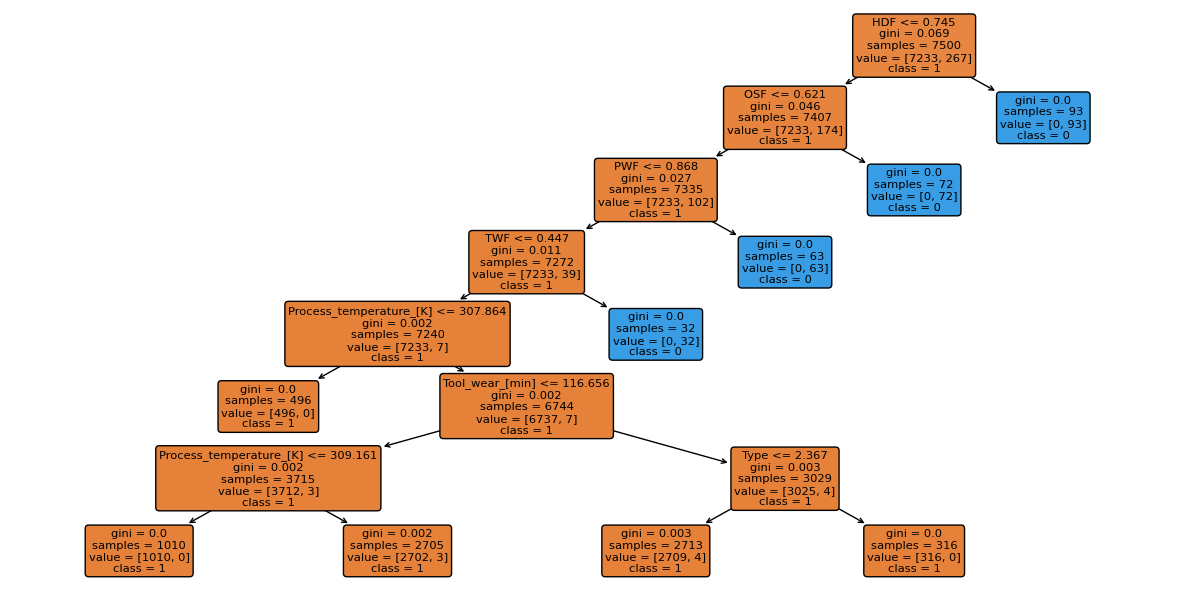

In [30]:

new_dtree = DecisionTreeClassifier(criterion='gini', max_depth=7,min_samples_leaf=1, min_samples_split=2,splitter='random')
new_dtree.fit(X_train, y_train)
plt.figure(figsize=(15,7.5))
plot_tree(new_dtree, filled=True, rounded=True, class_names=['1', '0'], feature_names=X.columns)

In [31]:
res = new_dtree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 0.9992


### SHAP Explainer

In [4]:
import os
from omnixai.data.tabular import Tabular
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.explainers.tabular import ShapTabular, LimeTabular, TabularExplainer
from omnixai.visualization.dashboard import Dashboard

In [5]:
data = pd.read_csv('ai4i2020.csv')
data.columns =  data.columns.str.replace(' ','_')
data.columns =  data.columns.str.replace(r'\[','', regex=True)
data.columns =  data.columns.str.replace(r'\]','', regex=True)
data.head()

,UDI,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
processed_data = data.drop(['UDI', 'Product_ID'], axis=1).copy()
processed_data

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [7]:
feature_names = list(processed_data.columns)
print(feature_names)
tabular_data = Tabular(
    data=processed_data,
    categorical_columns=['Type'],
    target_column='Machine_failure'
)
tabular_data

['Type', 'Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


     Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0       M              298.1                  308.6                  1551   
1       L              298.2                  308.7                  1408   
2       L              298.1                  308.5                  1498   
3       L              298.2                  308.6                  1433   
4       L              298.2                  308.7                  1408   
...   ...                ...                    ...                   ...   
9995    M              298.8                  308.4                  1604   
9996    H              298.9                  308.4                  1632   
9997    M              299.0                  308.6                  1645   
9998    H              299.0                  308.7                  1408   
9999    M              299.0                  308.7                  1500   

      Torque_Nm  Tool_wear_min  Machine_failure  TWF  HDF  PWF  OSF  RNF  


In [8]:
np.random.seed(1)
transformer = TabularTransform().fit(tabular_data)
class_names = transformer.class_names
x = transformer.transform(tabular_data)
train, test, train_labels, test_labels = train_test_split(x[:, :-1], x[:, -1], train_size=0.80)
print('Training data shape: {}'.format(train.shape))
print('Test data shape:     {}'.format(test.shape))
train_data = transformer.invert(train)
test_data = transformer.invert(test)


Training data shape: (8000, 13)
Test data shape:     (2000, 13)


In [9]:
gbtree = DecisionTreeClassifier( max_depth=7)
gbtree.fit(train, train_labels)
print('Test accuracy: {}'.format(accuracy_score(test_labels, gbtree.predict(test))))

Test accuracy: 0.9995


In [10]:
preprocess = lambda z: transformer.transform(z)


In [11]:
explainers = TabularExplainer(
    explainers=["lime", "shap", "mace", "pdp", "ale"],
    mode="classification",
    data=train_data,
    model=gbtree,
    preprocess=preprocess,
    params={
        "lime": {"kernel_width": 3},
        "shap": {"nsamples": 100},
        "mace": {"ignored_features": ["UDI", "Product_ID"]}
    }
)
# Generate explanations
test_instances = test_data[1653:1680]
local_explanations = explainers.explain(X=test_instances)
global_explanations = explainers.explain_global(
    params={"pdp": {"features": ['Type', 'Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']}}
)

  0%|          | 0/27 [00:00<?, ?it/s]

invalid value encountered in log
divide by zero encountered in double_scalars
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
invalid value encountered in multiply
invalid value encountered in subtract
invalid value encountered in log
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in subtract
invalid value encountered in log
divide by zero encountered in double_scalars
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in subtract
invalid value encountered in log
divide by zero encountered in double_scalars
invalid value encountered in multiply
divide by zero encountered in log
invalid value encountered in subtract
invalid value encountered in log
divide by zero encountered 

In [12]:
index=1
print("LIME results:")
local_explanations["lime"].ipython_plot(index, class_names=class_names)
print("SHAP results:")
local_explanations["shap"].ipython_plot(index, class_names=class_names)
print("MACE results:")
local_explanations["mace"].ipython_plot(index, class_names=class_names)
print("PDP results:")
global_explanations["pdp"].ipython_plot(class_names=class_names)
print("ALE results:")
global_explanations["ale"].ipython_plot(class_names=class_names)



LIME results:


SHAP results:


MACE results:


PDP results:


ALE results:


In [13]:
from omnixai.explainers.prediction import PredictionAnalyzer

analyzer = PredictionAnalyzer(
    mode="classification",
    test_data=test_data,
    test_targets=test_labels,
    model=gbtree,
    preprocess=preprocess
)
prediction_explanations = analyzer.explain()

In [14]:
for name, metrics in prediction_explanations.items():
    print(f"{name}:")
    metrics.ipython_plot(class_names=class_names)

metric:


confusion_matrix:


roc:


precision_recall:


cumulative_gain:


lift_curve:


In [15]:
# Launch a dashboard for visualization
dashboard = Dashboard(
    instances=test_instances,
    local_explanations=local_explanations,
    global_explanations=global_explanations,
    prediction_explanations=prediction_explanations,
    class_names=class_names
)
dashboard.show()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'omnixai.visualization.dashboard'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [23/Oct/2022 13:32:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /assets/base.css?m=1666220277.6778302 HTTP/1.1" 304 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /assets/styles.css?m=1666220277.6778302 HTTP/1.1" 304 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /assets/xai.css?m=1666220277.6778302 HTTP/1.1" 304 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /assets/resizing.js?m=1666220277.6778302 HTTP/1.1" 304 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /_favicon.ico?v=2.6.2 HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [23/Oct/2022 13:32:46] "GET /assets/logo_small.png HTTP/1.1" 304 -
127.0.0.1 - - [23/Oct/2022 13:32:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [23/